In [1]:
from os import listdir
from os.path import join,isfile
mypath=r"C:\Users\HP\Desktop\MTECH 2ND SEM\ML2\lfw\George_W_Bush"
file_names=[f for f in listdir(mypath) if isfile(join(mypath,f))]
print(str(len(file_names))+"image loaded")


530image loaded


In [2]:
Train=[]
for i in range(0,len(file_names)):
    Train.append(file_names[i])
    if i==370:
        break
Validation=[]
for  i in range(371,len(file_names)):
    Validation.append(file_names[i])
    if i==476:
        break
Test=[]
for i in range (477,len(file_names)):
    Test.append(file_names[i])
    if i==len(file_names):
        break

In [3]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
size=64
X_test=[]

for i,file in enumerate(Test):
    img=mypath+"\\"+file
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #print(img)
    img=cv2.resize(img,(size,size),interpolation=cv2.INTER_AREA)
    #img=img.flatten()
    
    #img=img.reshape((-1,62500))
    #print(img.shape)
    X_test.append(img)
    
    #print(img.shape)
    #cv2.imshow("img",img)
    #cv2.waitKey(0)
    
    #print(img_std.shape)
cv2.destroyAllWindows()



In [4]:
X_test=np.asarray(X_test)
X_test.shape

(53, 64, 64)

# PCA implementation 

In [5]:
recon_images=[]
from sklearn.decomposition import PCA,IncrementalPCA
pca=PCA()
for i in range(len(X_test)):
    pca.fit(X_test[i])
    var_cum=np.cumsum(pca.explained_variance_ratio_)*100
    k=np.argmax(var_cum>95)
    k=10
    ipca=IncrementalPCA(n_components=k)
    image_recon=ipca.inverse_transform(ipca.fit_transform(X_test[i]))
    recon_images.append(image_recon)
    


In [6]:
recon_images=np.asarray(recon_images)
recon_images.shape

(53, 64, 64)

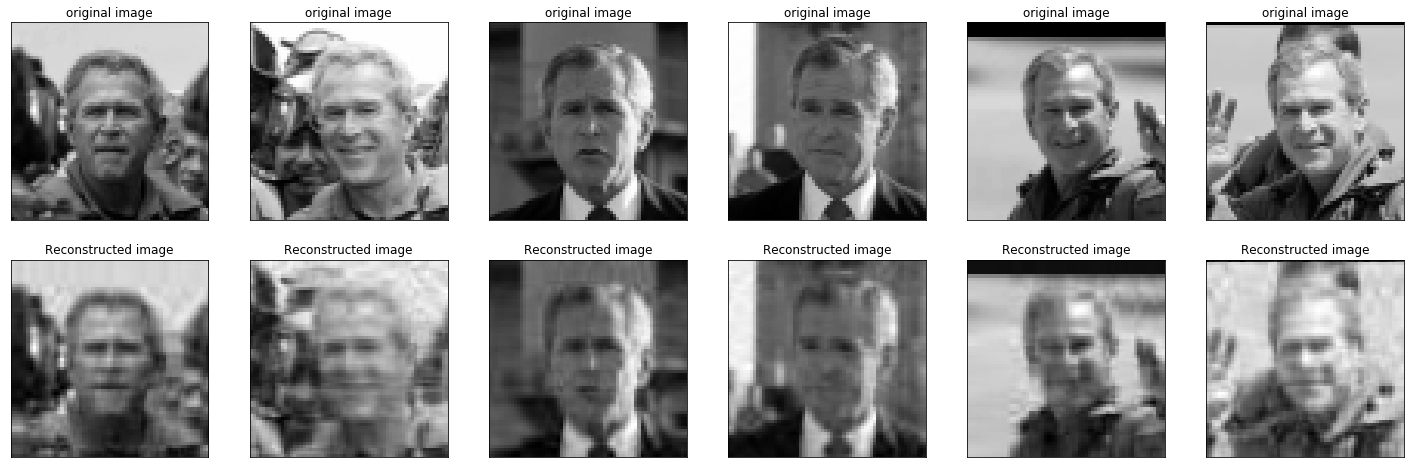

In [7]:
n=6
plt.figure(figsize=(25,8))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(64,64))
    plt.title("original image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(recon_images[i].reshape(64,64))
    plt.title("Reconstructed image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [8]:
X_train=[]
size=64
for i,file in enumerate(Train):
    img=mypath+"\\"+file
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    img=cv2.resize(img,(size,size),interpolation=cv2.INTER_AREA)
    X_train.append(img)
    
    #cv2.imshow("img",img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
X_train=np.asarray(X_train)
X_train.shape


(371, 64, 64)

In [10]:
X_validation=[]
for i,file in enumerate(Validation):
    img=mypath+"\\"+file
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(size,size),cv2.INTER_AREA)
    X_validation.append(img)
    #cv2.imshow("img",img)
    #cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
X_validation=np.asarray(X_validation)
X_validation.shape

(106, 64, 64)

# keras implementation 

In [12]:
from keras.layers import Dense,Input
from keras.models import Model
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [13]:
encoding_dim=550
input_img=Input(shape=(4096,))
encoded=Dense(encoding_dim,activation="relu")(input_img)
decoded=Dense(4096,activation='sigmoid')(encoded)
autoencoder=Model(input_img,decoded)
encoder=Model(input_img,encoded)
encoded_input=Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))

autoencoder.compile(optimizer="adamax",loss="mse")


In [14]:
X_train=X_train.astype("float32")/255
X_test=X_test.astype("float32")/255
X_validation=X_validation.astype("float32")/255

In [15]:


X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
X_validation=X_validation.reshape(len(X_validation),np.prod(X_validation.shape[1:]))

print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(371, 4096)
(53, 4096)
(106, 4096)


In [16]:
history=autoencoder.fit(X_train,X_train,epochs=100,batch_size=16,shuffle=True,validation_data=(X_validation,X_validation))


Train on 371 samples, validate on 106 samples
Epoch 1/100
371/371 [==============================] - 2s 5ms/step - loss: 0.0587 - val_loss: 0.0509
Epoch 2/100
371/371 [==============================] - 1s 4ms/step - loss: 0.0443 - val_loss: 0.0451
Epoch 3/100
371/371 [==============================] - 1s 4ms/step - loss: 0.0397 - val_loss: 0.0427
Epoch 4/100
371/371 [==============================] - 1s 4ms/step - loss: 0.0353 - val_loss: 0.0368
Epoch 5/100
371/371 [==============================] - 1s 4ms/step - loss: 0.0321 - val_loss: 0.0350
Epoch 6/100
371/371 [==============================] - 1s 4ms/step - loss: 0.0297 - val_loss: 0.0339
Epoch 7/100
371/371 [==============================] - 1s 4ms/step - loss: 0.0278 - val_loss: 0.0322
Epoch 8/100
371/371 [==============================] - 1s 4ms/step - loss: 0.0261 - val_loss: 0.0323
Epoch 9/100
371/371 [==============================] - 1s 4ms/step - loss: 0.0251 - val_loss: 0.0307
Epoch 10/100
371/371 [======================

In [17]:
encoded_imgs=encoder.predict(X_test)
print(encoded_imgs.shape)
decoded_imgs=decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

(53, 550)
(53, 4096)


In [18]:
x=decoded_imgs[0].reshape(128,128)
x.shape

ValueError: cannot reshape array of size 4096 into shape (128,128)

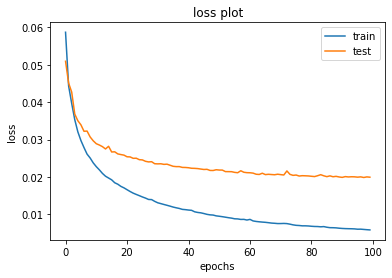

In [19]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss plot")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","test"],loc="upper right")
plt.show()

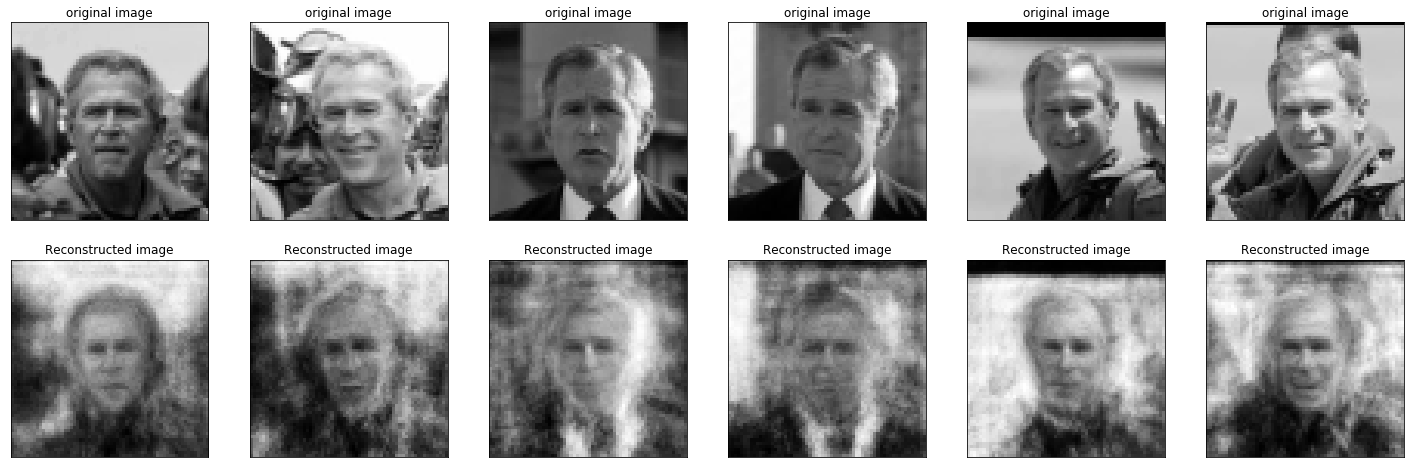

In [20]:
n=6
plt.figure(figsize=(25,8))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(64,64))
    plt.title("original image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(64,64))
    plt.title("Reconstructed image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# Nueral network implementation 

In [21]:
import cv2
import matplotlib.pyplot as plt
X_train=[]
size=64
for i,file in enumerate(Train):
    img=mypath+"\\"+file
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    img=cv2.resize(img,(size,size),interpolation=cv2.INTER_AREA)
    X_train.append(img)
    
    #cv2.imshow("img",img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
import numpy as np
X_train=np.asarray(X_train)
X_train.shape


(371, 64, 64)

In [23]:
X_validation=[]
for i,file in enumerate(Validation):
    img=mypath+"\\"+file
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(size,size),cv2.INTER_AREA)
    X_validation.append(img)
    #cv2.imshow("img",img)
    #cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
X_validation=np.asarray(X_validation)
X_validation.shape

(106, 64, 64)

In [25]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
size=64
X_test=[]

for i,file in enumerate(Test):
    img=mypath+"\\"+file
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    img=cv2.resize(img,(size,size),interpolation=cv2.INTER_AREA)
    
    X_test.append(img)
    
cv2.destroyAllWindows()



In [26]:
X_test=np.asarray(X_test)
X_test.shape

(53, 64, 64)

In [27]:
X_train=X_train.astype("float")/255
X_validation=X_validation.astype("float")/255
X_test=X_test.astype("float")/255

In [28]:

X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_validation=X_validation.reshape((len(X_validation),np.prod(X_validation.shape[1:])))
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
                         

(371, 4096)
(106, 4096)
(53, 4096)


In [68]:
import tensorflow as tf

class Autoencoder(object):
    def __init__(self, inout_dim, encoded_dim):
        learning_rate = 0.1
        
       
        hidden_layer_weights = tf.Variable(tf.random_normal([inout_dim, encoded_dim]))
        hidden_layer_biases = tf.Variable(tf.random_normal([encoded_dim]))
        output_layer_weights = tf.Variable(tf.random_normal([encoded_dim, inout_dim]))
        output_layer_biases = tf.Variable(tf.random_normal([inout_dim]))
        
     
        self.input_layer = tf.placeholder('float', [None, inout_dim])
        self.hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(self.input_layer, hidden_layer_weights), hidden_layer_biases))
        self.output_layer = (tf.add(tf.matmul(self.hidden_layer, output_layer_weights),output_layer_biases))
        self.actual_output = tf.placeholder('float', [None, inout_dim])
        
        self.mean_square_error = tf.reduce_mean(tf.square(self.output_layer - self.actual_output))
        self.opitimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.mean_square_error)
        self.training = tf.global_variables_initializer()
        self.session = tf.Session()
        
    def train(self, input_train, input_test, batch_size, epochs):
        self.session.run(self.training)
        
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(int(input_train.shape[0]/batch_size)):
                epoch_input = input_train[ i * batch_size : (i + 1) * batch_size ]
                _, c = self.session.run([self.opitimizer, self.mean_square_error], feed_dict={self.input_layer: epoch_input, self.actual_output: epoch_input})
                epoch_loss += c
                print('Epoch', epoch, '/', epochs, 'loss:',epoch_loss)
    def getEncodedImage(self, image):
        encoded_image = self.session.run(self.hidden_layer, feed_dict={self.input_layer:[image]})
        return encoded_image
    def getDecodedImage(self, image):
        decoded_image = self.session.run(self.output_layer, feed_dict={self.input_layer:[image]})
        return decoded_image

In [69]:
autoencodertf = Autoencoder(X_train.shape[1], 550)
autoencodertf.train(X_train,X_validation , 16, 100)

Epoch 0 / 100 loss: 276.951171875
Epoch 0 / 100 loss: 367.96790313720703
Epoch 0 / 100 loss: 415.68775177001953
Epoch 0 / 100 loss: 445.1302909851074
Epoch 0 / 100 loss: 463.5863037109375
Epoch 0 / 100 loss: 478.4400396347046
Epoch 0 / 100 loss: 492.96574878692627
Epoch 0 / 100 loss: 508.688307762146
Epoch 0 / 100 loss: 523.9491062164307
Epoch 0 / 100 loss: 538.4800071716309
Epoch 0 / 100 loss: 551.4019527435303
Epoch 0 / 100 loss: 562.4431533813477
Epoch 0 / 100 loss: 571.3556489944458
Epoch 0 / 100 loss: 579.5552358627319
Epoch 0 / 100 loss: 586.4479913711548
Epoch 0 / 100 loss: 592.2565126419067
Epoch 0 / 100 loss: 597.7502250671387
Epoch 0 / 100 loss: 603.0784530639648
Epoch 0 / 100 loss: 607.9831342697144
Epoch 0 / 100 loss: 612.6007137298584
Epoch 0 / 100 loss: 616.8766393661499
Epoch 0 / 100 loss: 620.6942307949066
Epoch 0 / 100 loss: 624.022331237793
Epoch 1 / 100 loss: 2.8731651306152344
Epoch 1 / 100 loss: 5.596981048583984
Epoch 1 / 100 loss: 7.888644695281982
Epoch 1 / 100 

In [ ]:
decoded_img = autoencodertf.getDecodedImage(X_test[0])
decoded_img.shape

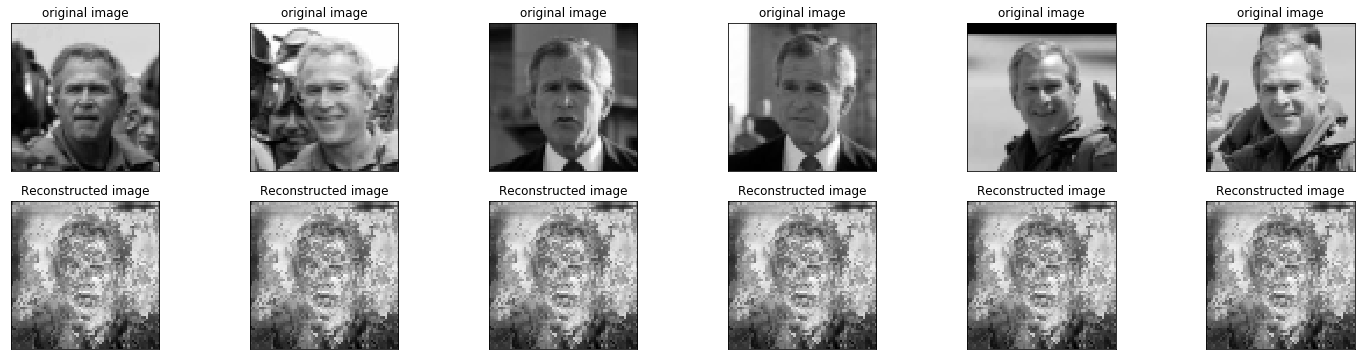

In [70]:
n=6
plt.figure(figsize=(25,6))
for i in range(n):
    encoded_img = autoencodertf.getEncodedImage(X_test[i])
    decoded_img = autoencodertf.getDecodedImage(X_test[i])
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(64,64))
    plt.title("original image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_img.reshape(64,64))
    plt.title("Reconstructed image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()